### BMI 데이터 분석 및 예측

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 한글 처리 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
# 데이터셋 불러오기
data = pd.read_csv("data/bmi.csv")
data.shape

(500, 4)

In [4]:
print(data.head())

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


In [5]:
# 통계량 확인
data.describe() 

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [6]:
# 결측치 확인
data.isnull().sum() 

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [7]:
data2 = data.loc[:, ['Gender','Height', 'Weight' ]]
data2.head()

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61


In [8]:
# BMI 계산 함수
def cal_bmi(weight, height):
    bmi = weight / (height / 100) ** 2
    return bmi 

In [9]:
res = cal_bmi(59, 190)
print(res)

16.343490304709142


In [10]:
# BMI 항목 추가
data2['BMI'] = data2['Weight'] / (data2['Height'] / 100) ** 2
data2.head()

,Gender,Height,Weight,BMI
0,Male,174,96,31.708284
1,Male,189,87,24.355421
2,Female,185,110,32.140248
3,Female,195,104,27.350427
4,Male,149,61,27.476240


In [11]:
# 필터링 1
mask1 = (data2.Height >= 180) & (data2.Gender == 'Male')
filter_result = data2.loc[mask1, :]
print(filter_result.shape)
filter_result.head()

(83, 4)


,Gender,Height,Weight,BMI
1,Male,189,87,24.355421
5,Male,189,104,29.114526
10,Male,195,81,21.301775
14,Male,191,79,21.655108
23,Male,185,139,40.613587


In [12]:
mask_male = (data2.Gender == 'Male')
df_male = data2.loc[mask_male, :]
print(df_male.shape)
df_male.head()

(245, 4)


,Gender,Height,Weight,BMI
0,Male,174,96,31.708284
1,Male,189,87,24.355421
4,Male,149,61,27.476240
5,Male,189,104,29.114526
6,Male,147,92,42.574853


In [13]:
mask_female = (data2.Gender == 'Female')
df_female = data2.loc[mask_female, :]
print(df_female.shape)
df_female.head()

(255, 4)


,Gender,Height,Weight,BMI
2,Female,185,110,32.140248
3,Female,195,104,27.350427
9,Female,169,103,36.063163
11,Female,159,80,31.644318
12,Female,192,101,27.398003


In [14]:
gender_count = data2['Gender'].value_counts()
gender_count

Female    255
Male      245
Name: Gender, dtype: int64

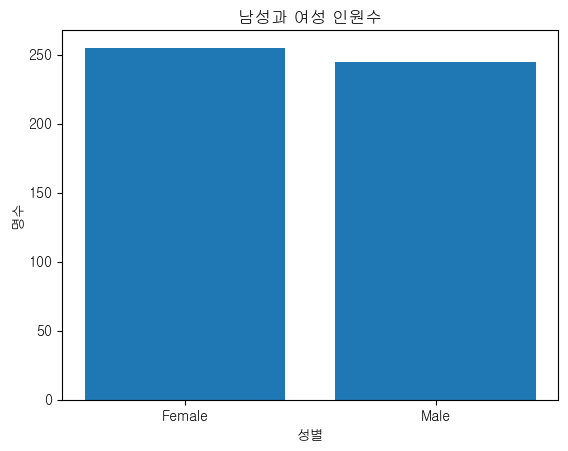

In [15]:
plt.bar(gender_count.index, gender_count.values)
plt.title("남성과 여성 인원수")
plt.xlabel("성별")
plt.ylabel("명수")
plt.show()

In [16]:
# 판단 함수 
def determination(bmi):
    if bmi < 18.5:
        decision = '저체중'
    elif bmi < 23:
        decision = '정상'
    elif bmi < 25:
        decision = '과체중'
    else:
        decision = '비만'
    return decision

In [17]:
# 판단 함수 적용
data2['Result'] = data2['BMI'].apply(determination)
data2.head()

,Gender,Height,Weight,BMI,Result
0,Male,174,96,31.708284,비만
1,Male,189,87,24.355421,과체중
2,Female,185,110,32.140248,비만
3,Female,195,104,27.350427,비만
4,Male,149,61,27.476240,비만


In [18]:
value_count = data2['Result'].value_counts()
value_count

비만     400
정상      47
저체중     34
과체중     19
Name: Result, dtype: int64

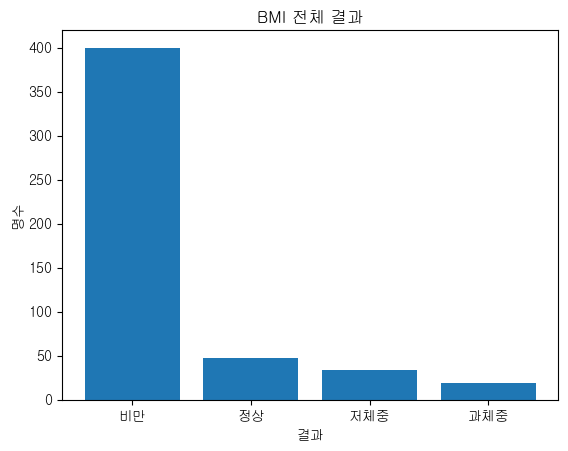

In [19]:
plt.bar(value_count.index, value_count.values)
plt.title("BMI 전체 결과")
plt.xlabel("결과")
plt.ylabel("명수")
plt.show()

In [20]:
df_male['Result'] = df_male['BMI'].apply(determination)
df_male.head()

C:\Users\UserK\AppData\Local\Temp\ipykernel_4704\1293725952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['Result'] = df_male['BMI'].apply(determination)


,Gender,Height,Weight,BMI,Result
0,Male,174,96,31.708284,비만
1,Male,189,87,24.355421,과체중
4,Male,149,61,27.476240,비만
5,Male,189,104,29.114526,비만
6,Male,147,92,42.574853,비만


In [21]:
value_count = df_male['Result'].value_counts()
value_count

비만     196
저체중     21
정상      20
과체중      8
Name: Result, dtype: int64

<AxesSubplot: >

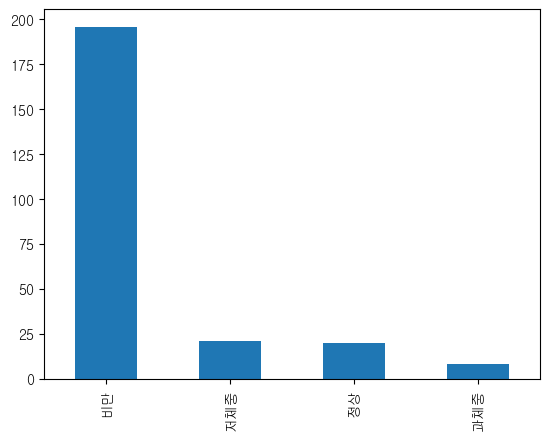

In [22]:
value_count.plot(kind='bar')

In [23]:
print(value_count.index)
print(value_count.values)

Index(['비만', '저체중', '정상', '과체중'], dtype='object')
[196  21  20   8]


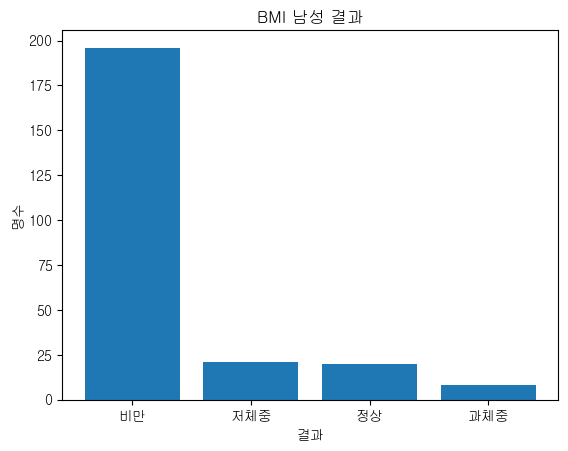

In [24]:
plt.bar(value_count.index, value_count.values)
plt.title("BMI 남성 결과")
plt.xlabel("결과")
plt.ylabel("명수")
plt.show()

In [25]:
df_female['Result'] = df_female['BMI'].apply(determination)
df_female.tail()

C:\Users\UserK\AppData\Local\Temp\ipykernel_4704\460172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['Result'] = df_female['BMI'].apply(determination)


,Gender,Height,Weight,BMI,Result
492,Female,198,50,12.753801,저체중
493,Female,170,53,18.339100,저체중
495,Female,150,153,68.000000,비만
496,Female,184,121,35.739603,비만
497,Female,141,136,68.407022,비만


In [26]:
value_count = df_female['Result'].value_counts()
value_count

비만     204
정상      27
저체중     13
과체중     11
Name: Result, dtype: int64

<AxesSubplot: >

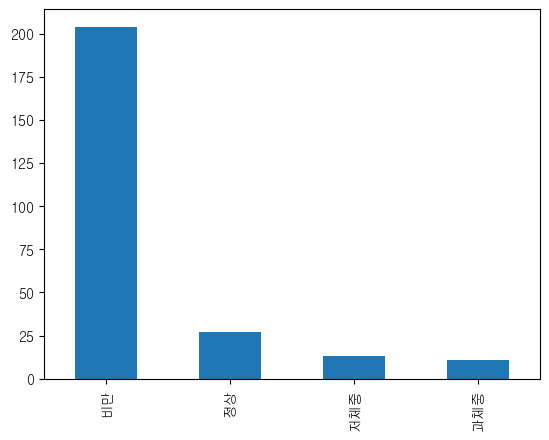

In [27]:
value_count.plot(kind='bar')

In [28]:
data3 = data;
data3.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [29]:
data3[['BMI', 'Result']] = data2[['BMI', 'Result']]
data3.head()

,Gender,Height,Weight,Index,BMI,Result
0,Male,174,96,4,31.708284,비만
1,Male,189,87,2,24.355421,과체중
2,Female,185,110,4,32.140248,비만
3,Female,195,104,3,27.350427,비만
4,Male,149,61,3,27.476240,비만


<AxesSubplot: xlabel='Height', ylabel='Weight'>

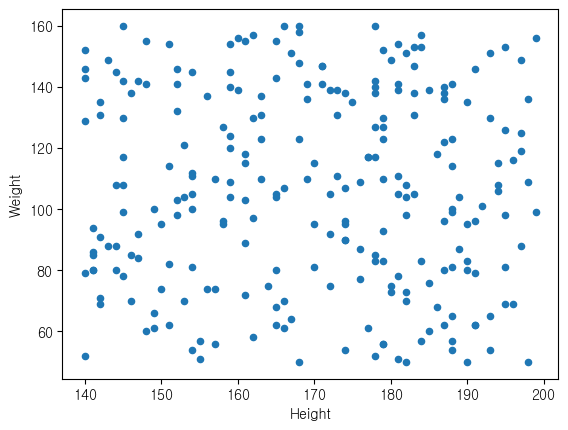

In [30]:
# 남자 여자 키, 몸무게 데이터 가져와서 시각화 하기
# 남자 키, 몸무게 데이터 가져오기
data_male = df_male[['Height', 'Weight']]
data_male.plot.scatter(x='Height', y='Weight')


<AxesSubplot: xlabel='Height', ylabel='Weight'>

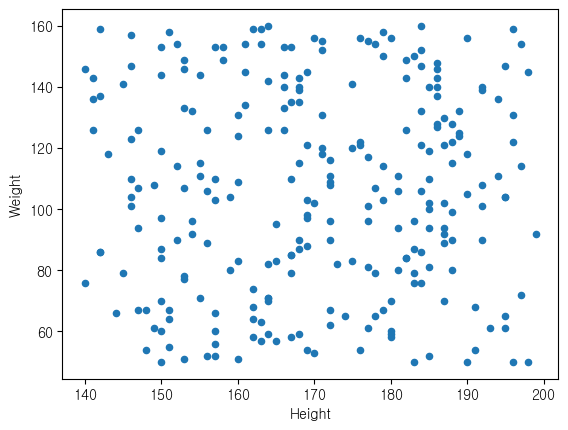

In [31]:
data_female = df_female[['Height', 'Weight']]
data_female.plot.scatter(x='Height', y='Weight')

In [32]:
# 시리즈를 리스트로 변경하기 
male_height = np.array(data_male['Height'])
male_weight = np.array(data_male['Weight'])
female_height = np.array(data_female['Height'])
female_weight = np.array(data_female['Weight'])
print(female_height)

[185 195 169 159 192 153 157 153 169 172 151 163 195 160 157 189 197 171
 185 175 149 182 188 168 176 187 164 191 141 179 172 168 164 194 153 185
 197 168 176 166 190 175 159 185 178 183 194 170 190 198 192 181 150 146
 192 177 165 146 176 168 184 158 145 168 187 158 167 171 183 190 169 167
 140 168 196 150 168 155 179 182 187 184 182 172 156 151 188 196 185 170
 181 166 162 192 167 182 161 142 177 166 156 150 196 148 150 153 196 185
 171 143 142 141 173 152 155 171 186 153 184 177 174 146 177 183 142 188
 162 162 172 150 169 184 157 187 163 187 179 147 147 192 156 162 165 168
 169 140 187 186 156 180 179 180 154 190 181 144 148 199 167 164 185 164
 172 157 167 164 189 161 155 171 154 184 191 157 160 189 186 180 186 193
 151 195 184 185 186 147 160 163 150 154 182 197 160 157 150 167 180 183
 183 152 164 149 195 146 166 177 161 157 169 152 162 177 195 186 178 180
 187 153 165 178 163 150 153 166 172 186 176 146 172 169 183 188 175 184
 145 181 188 178 167 164 151 147 155 172 142 188 16

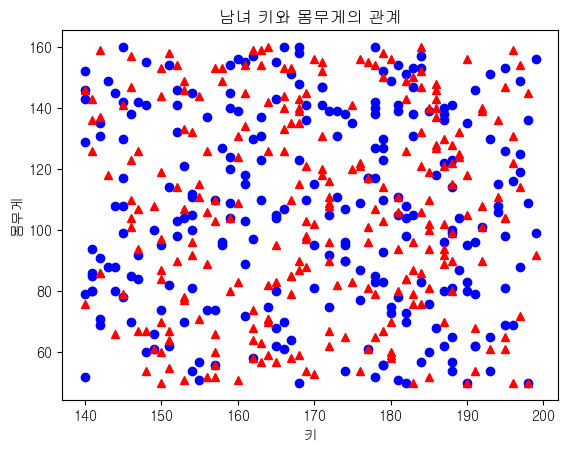

In [33]:
plt.plot(male_height, male_weight, 'o', color='blue')
plt.plot(female_height, female_weight, '^', color='red')
plt.title("남녀 키와 몸무게의 관계")
plt.xlabel("키")
plt.ylabel("몸무게")
plt.show()


In [34]:
data4 = data3.set_index(keys=['Result'], inplace=False)
data4.head()

,Gender,Height,Weight,Index,BMI
Result,,,,,
비만,Male,174,96,4,31.708284
과체중,Male,189,87,2,24.355421
비만,Female,185,110,4,32.140248
비만,Female,195,104,3,27.350427
비만,Male,149,61,3,27.476240


In [35]:
data4.index.unique()

Index(['비만', '과체중', '정상', '저체중'], dtype='object', name='Result')

함수를 이용하여 카테고리별로 분류한 그래프 그리기

In [36]:
def myScatter (label, color) : 
    la_data = data4.loc[label]
    plt.scatter(la_data['Weight'],
               la_data['Height'],
               c = color,
               label = label)

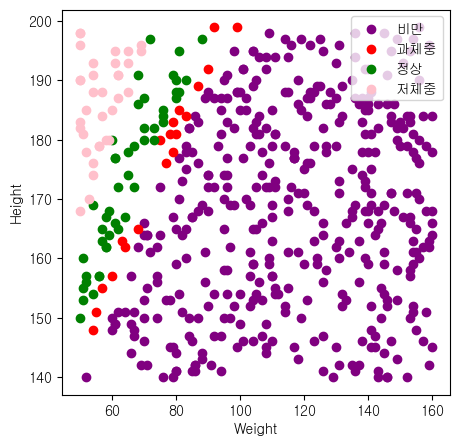

In [37]:
plt.figure(figsize=(5,5))
myScatter('비만','purple')
myScatter('과체중','red')
myScatter('정상','green')
myScatter('저체중','pink')

plt.legend()
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

### 모델링 하기(KNN을 이용한 분류)

In [38]:
#인덱스를 리셋해서 컬럼자리로 보내기
data4.reset_index(inplace=True)
data4.head()

,Result,Gender,Height,Weight,Index,BMI
0,비만,Male,174,96,4,31.708284
1,과체중,Male,189,87,2,24.355421
2,비만,Female,185,110,4,32.140248
3,비만,Female,195,104,3,27.350427
4,비만,Male,149,61,3,27.476240


In [39]:
data4[['Height','Weight']].head()


,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61


In [40]:
X = data4.iloc[:,2:4] #문제
y = data4.iloc[:,0] # 정답
X.head()


,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61


In [41]:
# 2. train(훈련셋)과 test(평가셋) 분리
# 7:3
# train > 350, test > 150
X_train = X.iloc[:350,:]# 훈련 문제
X_test = X.iloc[350:,:] # 평가 문제
y_train = y[:350] # 훈련 답
y_test = y[350:] # 평가 답
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 2) (350,)
(150, 2) (150,)


KNN을 이용한 분류

In [42]:
from sklearn.neighbors import KNeighborsClassifier #KNN 모델 Classifier 분류

knn_model=KNeighborsClassifier() #객체 생성

knn_model.fit(X_train, y_train) #학습하는 코드(문제, 답)

pre = knn_model.predict(X_test) # 예측하는 코드 (문제,답)
print(pre)

['비만' '과체중' '정상' '비만' '저체중' '비만' '비만' '비만' '저체중' '비만' '저체중' '비만' '비만' '비만'
 '비만' '비만' '비만' '비만' '비만' '비만' '비만' '비만' '저체중' '정상' '비만' '비만' '비만' '비만'
 '비만' '비만' '비만' '저체중' '비만' '비만' '비만' '저체중' '비만' '비만' '비만' '정상' '정상' '정상'
 '정상' '비만' '비만' '비만' '비만' '비만' '비만' '비만' '비만' '비만' '정상' '비만' '비만' '비만'
 '정상' '비만' '비만' '비만' '저체중' '비만' '비만' '비만' '비만' '비만' '비만' '정상' '비만' '정상'
 '저체중' '비만' '비만' '비만' '저체중' '저체중' '비만' '비만' '비만' '비만' '비만' '비만' '비만' '비만'
 '정상' '비만' '비만' '비만' '저체중' '비만' '비만' '정상' '비만' '비만' '비만' '비만' '비만' '비만'
 '비만' '비만' '비만' '비만' '비만' '저체중' '과체중' '과체중' '비만' '비만' '비만' '비만' '비만' '비만'
 '저체중' '비만' '비만' '비만' '비만' '비만' '비만' '비만' '비만' '비만' '정상' '비만' '비만' '비만'
 '비만' '정상' '과체중' '비만' '비만' '비만' '비만' '비만' '비만' '비만' '비만' '정상' '비만' '비만'
 '정상' '비만' '저체중' '정상' '비만' '비만' '비만' '비만' '비만' '비만']


In [43]:
from sklearn import metrics #평가 지표 라이브러리
metrics.accuracy_score(pre, y_test) #예측한답, 실제답

0.9466666666666667

In [44]:
knn_model.predict([[190,59]])


c:\Python\311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['저체중'], dtype=object)